In [4]:
import pandas as pd
import numpy as np

In [5]:
header_file = 'NGC_6426I_2/header_info_images6426I_2'
data_file = 'NGC_6426I_2/lc193.data'
date_format = 'HJD'

In [6]:
header_info = pd.read_csv(header_file, delim_whitespace=True, names=['file', 'JD', 'HJD', 'UT', 'EXPTIME', 'FILTER'], index_col=False)

lc_data = pd.read_csv(data_file, delim_whitespace=True, names=[date_format, 'Flux', 'errFlux', 'refFlux', 'errRefF', 'calSNR'], index_col=False)

/tmp/ipykernel_59502/1507003783.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  header_info = pd.read_csv(header_file, delim_whitespace=True, names=['file', 'JD', 'HJD', 'UT', 'EXPTIME', 'FILTER'], index_col=False)
/tmp/ipykernel_59502/1507003783.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc_data = pd.read_csv(data_file, delim_whitespace=True, names=[date_format, 'Flux', 'errFlux', 'refFlux', 'errRefF', 'calSNR'], index_col=False)


In [7]:
header_info.head()

,file,JD,HJD,UT,EXPTIME,FILTER
0,202505161412o.fit,2.460812e+06,2.460812e+06,10:23:34,100.0,I
1,202506020001o.fit,2.460829e+06,2.460829e+06,05:23:13,120.0,I
2,202506020003o.fit,2.460829e+06,2.460829e+06,06:05:27,120.0,I
3,202506020005o.fit,2.460829e+06,2.460829e+06,06:11:17,120.0,I
4,202506020007o.fit,2.460829e+06,2.460829e+06,06:17:05,120.0,I


In [8]:
header_info['JD']

0      2.460812e+06
1      2.460829e+06
2      2.460829e+06
3      2.460829e+06
4      2.460829e+06
           ...     
203    2.460833e+06
204    2.460833e+06
205    2.460833e+06
206    2.460833e+06
207    2.460833e+06
Name: JD, Length: 208, dtype: float64

In [9]:
header_info['JD'].apply(type).value_counts()

JD
<class 'float'>    208
Name: count, dtype: int64

In [10]:
# JD - 2460400
header_info['JD'] = header_info['JD'] - 2460400
header_info['HJD'] = header_info['HJD'] - 2460400

## Julio 2025

In [1]:
import pandas as pd

from smoothing_methods import plot_lc, plot_axes_lc, plot_subset, smooth_lc, shift_phase
from process_methods import raw_lc_to_df, zero_point_align

In [2]:
# Archivos
DATA_DIR_0 = 'NGC_6426V_1'
LC_NUM_0 = 202
data_file_0 = f'{DATA_DIR_0}/lc{str(LC_NUM_0)}.data'

# Leemos
#lc_data_0 = pd.read_csv(data_file_0, header=None, delim_whitespace=True)
lc0_df = raw_lc_to_df(data_file_0, 'HJD')


lc0_df.head(5)

/home/astro/iraf/isis_workspace/isis_host/package/isis_tools/process_methods.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc_data = pd.read_csv(lc_data_path, delim_whitespace=True, names=[date_format, 'Flux', 'errFlux', 'refFlux', 'errRefF', 'calSNR'], index_col=False)


,HJD,Flux,errFlux,refFlux,errRefF,calSNR
0,401.830477,1199.4231,108.4046,1153.2573,109.1831,0.7817
1,401.833938,1231.5111,108.1355,1194.7484,108.8850,0.7365
2,401.840153,1384.3107,128.5442,1367.1120,129.1482,0.8582
3,401.844170,1368.4204,130.1878,1345.5456,130.8277,0.8381
4,401.848175,1406.9152,122.0878,1382.3642,122.8367,0.8403


In [3]:
print(lc0_df['Flux'].median())

144.5655


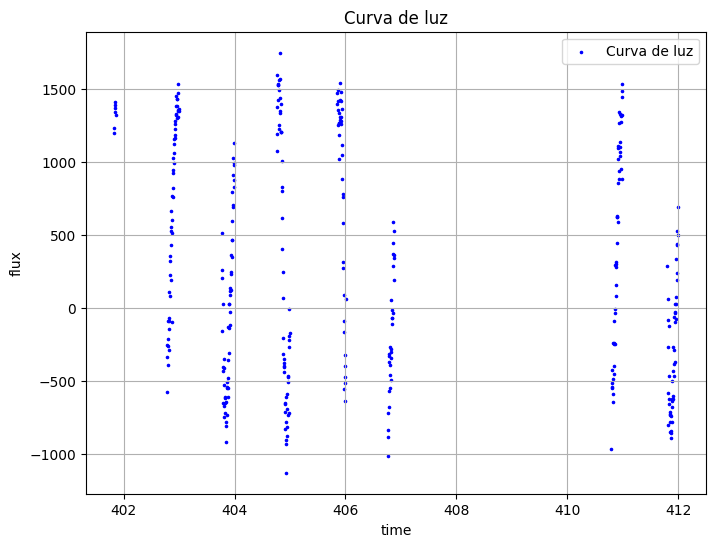

In [4]:
plot_lc(lc0_df['HJD'], lc0_df['Flux'])

In [5]:
aligned_lc = zero_point_align(lc0_df)

aligned_lc.head(5)

,HJD,Flux,errFlux,refFlux,errRefF,calSNR
0,401.830477,1054.8576,108.4046,1153.2573,109.1831,0.7817
1,401.833938,1086.9456,108.1355,1194.7484,108.8850,0.7365
2,401.840153,1239.7452,128.5442,1367.1120,129.1482,0.8582
3,401.844170,1223.8549,130.1878,1345.5456,130.8277,0.8381
4,401.848175,1262.3497,122.0878,1382.3642,122.8367,0.8403


In [6]:
print(aligned_lc['Flux'].median())

print(lc0_df['Flux'].median())

1.4210854715202004e-14
144.5655


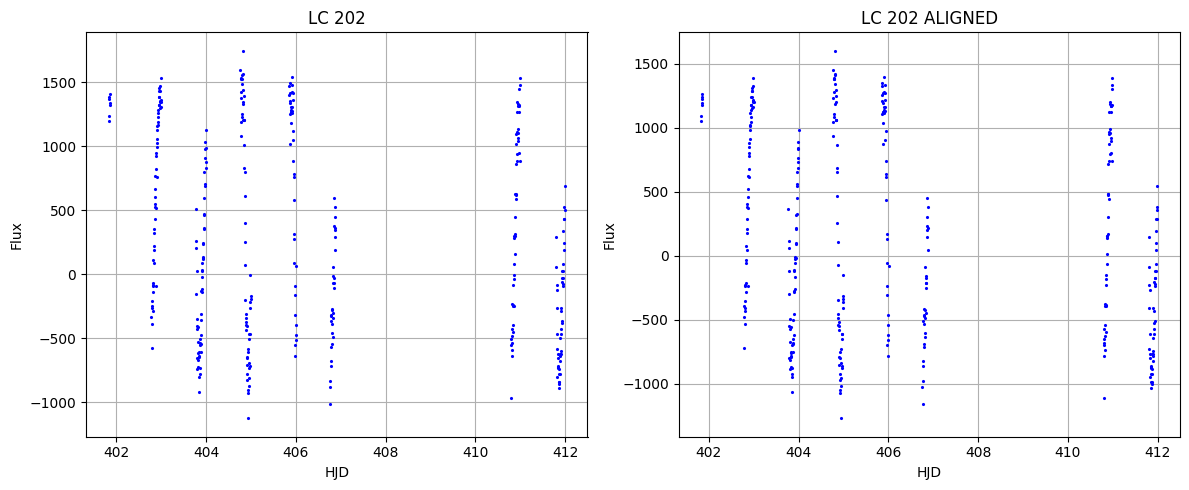

In [7]:
import matplotlib.pyplot as plt

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# fig 1
plot_axes_lc(lc0_df['HJD'], lc0_df['Flux'], ax=axs[0])
axs[0].set_title(f'LC {LC_NUM_0}')

# fig 2
plot_axes_lc(aligned_lc['HJD'], aligned_lc['Flux'], ax=axs[1])
axs[1].set_title(f'LC {LC_NUM_0} ALIGNED')


# plot
plt.tight_layout()
plt.show()